<a href="https://colab.research.google.com/github/JoshFowles/Week-11-Lab/blob/main/Week_11_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 11 Lab

## Objectives

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

We will use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [67]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [68]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/daily_aqi_by_county_2022.csv')

Mounted at /content/gdrive


In [69]:
#look at the top rows
df.head(10) 

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2022-01-02,22,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2022-01-05,36,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2022-01-08,35,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2022-01-11,15,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2022-01-14,48,Good,PM2.5,01-003-0010,1
5,Alabama,Baldwin,1,3,2022-01-17,23,Good,PM2.5,01-003-0010,1
6,Alabama,Baldwin,1,3,2022-01-20,11,Good,PM2.5,01-003-0010,1
7,Alabama,Baldwin,1,3,2022-01-23,30,Good,PM2.5,01-003-0010,1
8,Alabama,Baldwin,1,3,2022-01-26,24,Good,PM2.5,01-003-0010,1
9,Alabama,Baldwin,1,3,2022-01-29,18,Good,PM2.5,01-003-0010,1


In [70]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202786 entries, 0 to 202785
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 202786 non-null  object
 1   county Name                202786 non-null  object
 2   State Code                 202786 non-null  int64 
 3   County Code                202786 non-null  int64 
 4   Date                       202786 non-null  object
 5   AQI                        202786 non-null  int64 
 6   Category                   202786 non-null  object
 7   Defining Parameter         202786 non-null  object
 8   Defining Site              202786 non-null  object
 9   Number of Sites Reporting  202786 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.5+ MB


In [71]:
#describe the data before cleaning it
df.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,202786.000000,202786.000000,202786.000000,202786.000000
mean,30.798492,80.732684,39.571815,1.868566
std,16.062924,90.523703,31.593546,2.223764
min,1.000000,1.000000,0.000000,1.000000
25%,18.000000,25.000000,30.000000,1.000000
50%,33.000000,59.000000,39.000000,1.000000
75%,42.000000,107.000000,46.000000,2.000000
max,80.000000,810.000000,7577.000000,33.000000


## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [72]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df[(df['State Code'] < 51)]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna() 

df_clean.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,177171.000000,177171.000000,177171.000000,177171.000000
mean,27.306997,79.813006,40.411664,1.868692
std,13.948252,78.323786,32.946398,2.157091
min,1.000000,1.000000,0.000000,1.000000
25%,17.000000,25.000000,31.000000,1.000000
50%,28.000000,61.000000,39.000000,1.000000
75%,39.000000,110.000000,47.000000,2.000000
max,50.000000,510.000000,7577.000000,30.000000


In [73]:
df_clean = df_clean[(df_clean['AQI'] < 501)]

df_clean.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,177154.000000,177154.000000,177154.000000,177154.000000
mean,27.308878,79.816154,40.227474,1.868346
std,13.947439,78.326755,17.701786,2.156586
min,1.000000,1.000000,0.000000,1.000000
25%,17.000000,25.000000,31.000000,1.000000
50%,28.000000,61.000000,39.000000,1.000000
75%,39.000000,110.000000,47.000000,2.000000
max,50.000000,510.000000,495.000000,30.000000


# Standardize attributes

- Convert the "college" and "considering_change_of_plan" attributes to 0 or 1
- Convert non-numeric attributes to numeric scale of 1-3


In [74]:
#Get distinct values
df_clean['Category'].unique() 

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

In [75]:
df_clean.loc[df_clean['Category'] == 'Good', 'Category'] = "0" 
df_clean.loc[df_clean['Category'] == 'Moderate', 'Category'] = "1" 
df_clean.loc[df_clean['Category'] == 'Unhealthy for Sensitive Groups', 'Category'] = "2"
df_clean.loc[df_clean['Category'] == 'Unhealthy', 'Category'] = "3"
df_clean.loc[df_clean['Category'] == 'Very Unhealthy', 'Category'] = "4"
df_clean.loc[df_clean['Category'] == 'Hazardous', 'Category'] = "5"


df_clean.head(10) 

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2022-01-02,22,0,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2022-01-05,36,0,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2022-01-08,35,0,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2022-01-11,15,0,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2022-01-14,48,0,PM2.5,01-003-0010,1
5,Alabama,Baldwin,1,3,2022-01-17,23,0,PM2.5,01-003-0010,1
6,Alabama,Baldwin,1,3,2022-01-20,11,0,PM2.5,01-003-0010,1
7,Alabama,Baldwin,1,3,2022-01-23,30,0,PM2.5,01-003-0010,1
8,Alabama,Baldwin,1,3,2022-01-26,24,0,PM2.5,01-003-0010,1
9,Alabama,Baldwin,1,3,2022-01-29,18,0,PM2.5,01-003-0010,1


# Convert attributes to factors

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

In [76]:
#Method #1
#df_clean['leave'] = pd.Categorical(df_clean['leave'])

#Method #2
df_clean['Category'] = df_clean['Category'].astype('category')


df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177154 entries, 0 to 178743
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State Name                 177154 non-null  object  
 1   county Name                177154 non-null  object  
 2   State Code                 177154 non-null  int64   
 3   County Code                177154 non-null  int64   
 4   Date                       177154 non-null  object  
 5   AQI                        177154 non-null  int64   
 6   Category                   177154 non-null  category
 7   Defining Parameter         177154 non-null  object  
 8   Defining Site              177154 non-null  object  
 9   Number of Sites Reporting  177154 non-null  int64   
dtypes: category(1), int64(4), object(5)
memory usage: 13.7+ MB


## Fit a basic tree model

Use just two variables, 'income' and 'house'. We'll call this the "money tree." 

What is the accuracy of the money tree? 

In [77]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['Number of Sites Reporting']]
y = df_clean['Category']

money_tree = DecisionTreeClassifier()

# Create Decision Tree Classifer
money_tree = money_tree.fit(x,y)


## Preview the tree


In [78]:
money_tree_text = tree.export_text(money_tree)
print(money_tree_text)

|--- feature_0 <= 2.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- class: 0
|--- feature_0 >  2.50
|   |--- feature_0 <= 8.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  4.50
|   |   |   |--- feature_0 <= 7.50
|   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |--- feature_0 <= 5.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  5.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  7.50
|   |   |   |   |--- class: 0
|   |--- feature_0 >  8.50
|   |   |--- feature_0 <= 10.50
|   |   |   |--- feature_0 <= 9.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  9.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  10.50
|   |   |   |--- feature_0 <= 22.00
|   | 

## Check Accuracy

What is the accuracy of the money_tree? Use these steps to calculate accuracy.

Is this over fitted?

In [79]:
pred = money_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.8261738374521602


## Prune the tree

Limit the number of levels to 2

In [80]:
money_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Create Decision Tree Classifer
money_tree2 = money_tree2.fit(x,y)


## Preview the new tree

In [81]:
money_tree2_text = tree.export_text(money_tree2)
print(money_tree2_text)

|--- feature_0 <= 2.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- class: 0
|--- feature_0 >  2.50
|   |--- feature_0 <= 7.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  4.50
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- feature_0 <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  5.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: 0
|   |--- feature_0 >  7.50
|   |   |--- feature_0 <= 10.50
|   |   |   |--- feature_0 <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  8.50
|   |   |   |   |--- feature_0 <= 9.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  9.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  10.50
|   |   |   |--- feature_0 <= 22.00
|   |   |   |   |-

## Re-Check Accuracy

Is this accuracy better than making a random guess?  (check the distribution above)

In [82]:
pred = money_tree2.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.8261738374521602


## Visualize the model

In [83]:
classes = df_clean['Category'].unique()
print(classes)


['0', '1', '2', '3', '4', '5']
Categories (6, object): ['0', '1', '2', '3', '4', '5']


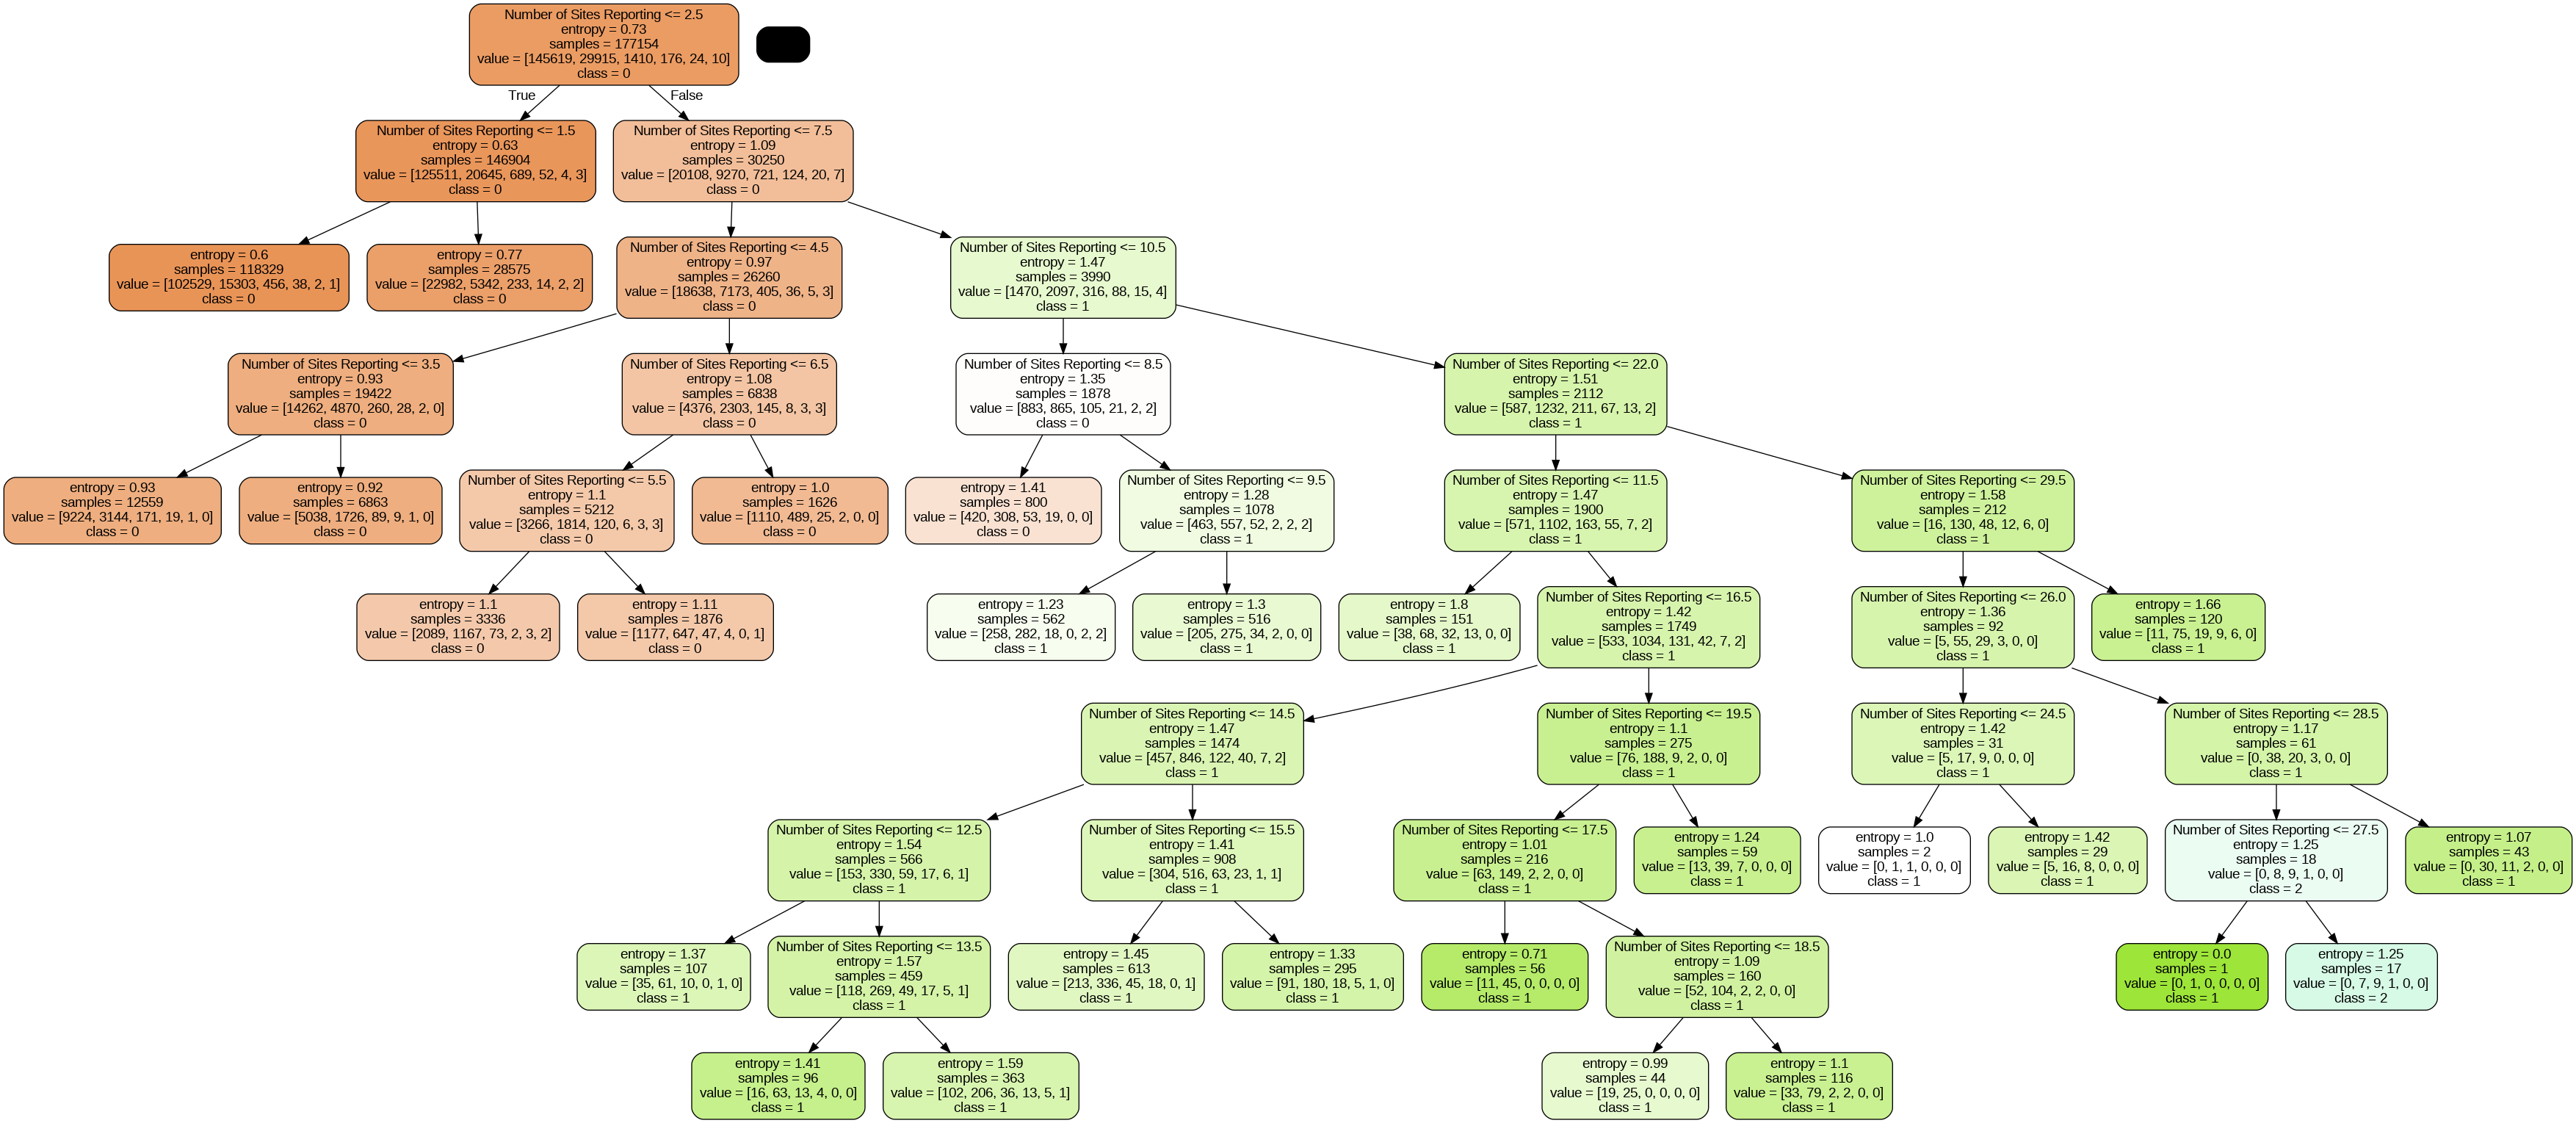

In [84]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(money_tree2, out_file=dot_data, 
                   feature_names=['Number of Sites Reporting'],class_names=classes, 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())